In [40]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import datetime
import matplotlib.dates as mdates


In [2]:
#get the data from the csv file in a pd dataframe.
bike = pd.read_csv('london_merged.csv')

In [3]:
display(bike)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
#get info on each collumns data type.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
#count unique values in weather code collumn
bike.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [6]:
#count unique values in season
bike.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [7]:
#sepicify the new collumns names
new_col_dict = {
    'timestamp':'timestamp',
    'cnt':'count',
    't1':'temp_C',
    't2':'tem_felt',
    'wind_speed':'wind_km/h',
    'weather_code':'weather'
}
#rename bike collumns
bike.rename(new_col_dict, axis=1, inplace = True)

In [8]:
bike

,timestamp,count,temp_C,tem_felt,hum,wind_km/h,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [9]:
# Convert the 'timestamp' column to datetime type
bike['timestamp'] = pd.to_datetime(bike['timestamp'])

# Extract 'date' and 'time' components from 'timestamp' column
bike['date'] = bike['timestamp'].dt.date
bike['time'] = bike['timestamp'].dt.time

# Drop the original 'timestamp' column
bike = bike.drop('timestamp', axis=1)

# Display the updated dataframe
print(bike.head())

   count  temp_C  tem_felt    hum  wind_km/h  weather  is_holiday  is_weekend  \
0    182     3.0       2.0   93.0        6.0      3.0         0.0         1.0   
1    138     3.0       2.5   93.0        5.0      1.0         0.0         1.0   
2    134     2.5       2.5   96.5        0.0      1.0         0.0         1.0   
3     72     2.0       2.0  100.0        0.0      1.0         0.0         1.0   
4     47     2.0       0.0   93.0        6.5      1.0         0.0         1.0   

   season        date      time  
0     3.0  2015-01-04  00:00:00  
1     3.0  2015-01-04  01:00:00  
2     3.0  2015-01-04  02:00:00  
3     3.0  2015-01-04  03:00:00  
4     3.0  2015-01-04  04:00:00  


In [10]:
bike = bike[['date', 'time'] + [col for col in bike.columns if col not in ['date', 'time']]]
display(bike)

,date,time,count,temp_C,tem_felt,hum,wind_km/h,weather,is_holiday,is_weekend,season
0,2015-01-04,00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04,01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04,02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04,03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04,04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03,19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03,20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03,21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03,22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [11]:
# define a dictionary to map season numbers to their corresponding names
season_dict = {
    0: 'spring',
    1: 'summer',
    2: 'autumn',
    3: 'winter'
}
# use the map() method to replace season values with their corresponding names
bike['season'] = bike['season'].map(season_dict)

In [12]:
# define a dictionary to map season numbers to their corresponding names
weather_dict = {
    1: 'clear',
    2: 'scatered clouds',
    3: 'broken clouds',
    4: 'cloudy',
    7: 'rain',
    10: 'storm',
    26: 'snow',
}
# use the map() method to replace season values with their corresponding names
bike['weather'] = bike['weather'].map(weather_dict)

In [13]:
bike

,date,time,count,temp_C,tem_felt,hum,wind_km/h,weather,is_holiday,is_weekend,season
0,2015-01-04,00:00:00,182,3.0,2.0,93.0,6.0,broken clouds,0.0,1.0,winter
1,2015-01-04,01:00:00,138,3.0,2.5,93.0,5.0,clear,0.0,1.0,winter
2,2015-01-04,02:00:00,134,2.5,2.5,96.5,0.0,clear,0.0,1.0,winter
3,2015-01-04,03:00:00,72,2.0,2.0,100.0,0.0,clear,0.0,1.0,winter
4,2015-01-04,04:00:00,47,2.0,0.0,93.0,6.5,clear,0.0,1.0,winter
...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03,19:00:00,1042,5.0,1.0,81.0,19.0,broken clouds,0.0,0.0,winter
17410,2017-01-03,20:00:00,541,5.0,1.0,81.0,21.0,cloudy,0.0,0.0,winter
17411,2017-01-03,21:00:00,337,5.5,1.5,78.5,24.0,cloudy,0.0,0.0,winter
17412,2017-01-03,22:00:00,224,5.5,1.5,76.0,23.0,cloudy,0.0,0.0,winter


In [15]:
# compute summary statistics for numeric columns
print(bike[['count', 'temp_C', 'tem_felt', 'hum', 'wind_km/h']].describe())

              count        temp_C      tem_felt           hum     wind_km/h
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000
mean    1143.101642     12.468091     11.520836     72.324954     15.913063
std     1085.108068      5.571818      6.615145     14.313186      7.894570
min        0.000000     -1.500000     -6.000000     20.500000      0.000000
25%      257.000000      8.000000      6.000000     63.000000     10.000000
50%      844.000000     12.500000     12.500000     74.500000     15.000000
75%     1671.750000     16.000000     16.000000     83.000000     20.500000
max     7860.000000     34.000000     34.000000    100.000000     56.500000


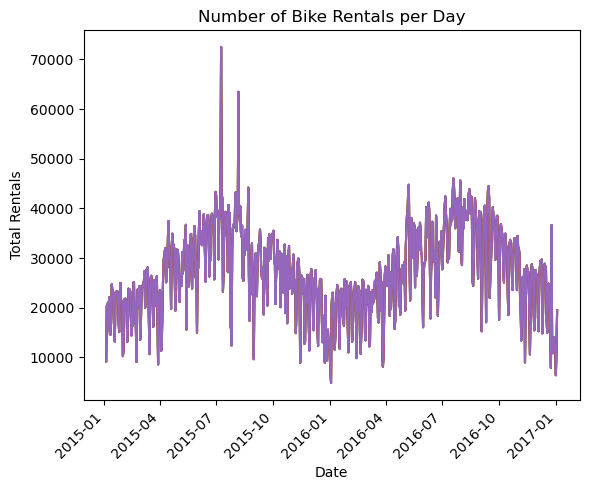

In [30]:
# group the data by date and calculate the total number of rentals for each day
daily_rentals = bike.groupby('date')['count'].sum()

# create a line plot to show the trend of bike rentals over time
plt.plot(daily_rentals.index, daily_rentals.values)

# set the title, x-axis label, and y-axis label
plt.title('Number of Bike Rentals per Day')
plt.xlabel('Date')
plt.ylabel('Total Rentals')

# format x-axis labels to show only the month and year
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# display the plot
plt.show()


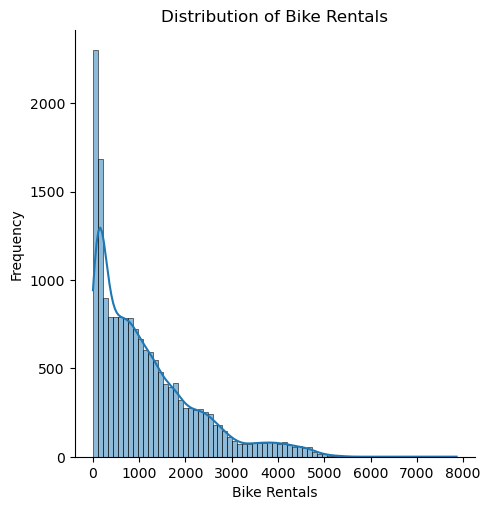

In [41]:
#A histogram showing the distribution of bike rentals
sns.displot(data=bike, x="count", kind="hist", kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Bike Rentals')
plt.ylabel('Frequency')
plt.show()


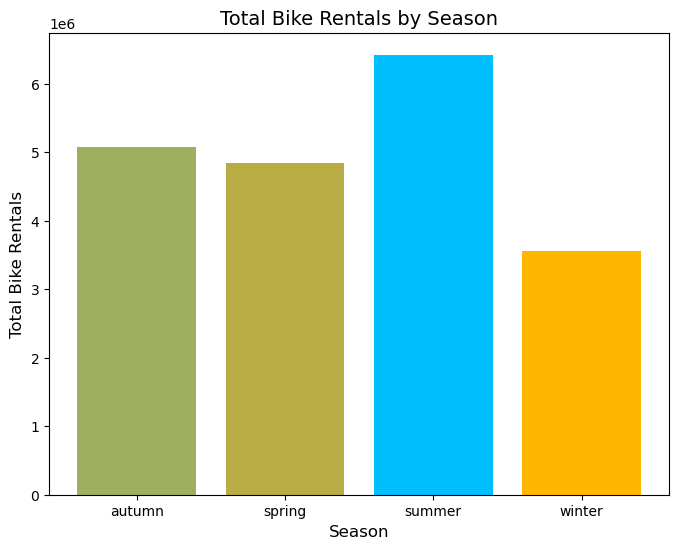

In [43]:
# calculate total rentals by season
season_counts = bike.groupby('season')['count'].sum()

# define colors for each season
colors = mcolors.LinearSegmentedColormap.from_list("", ["lightgreen", "gold", "orange", "deepskyblue"])

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(season_counts.index, season_counts, color=colors(season_counts/season_counts.max()))
ax.set_title('Total Bike Rentals by Season', fontsize=14)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Total Bike Rentals', fontsize=12)

plt.show()

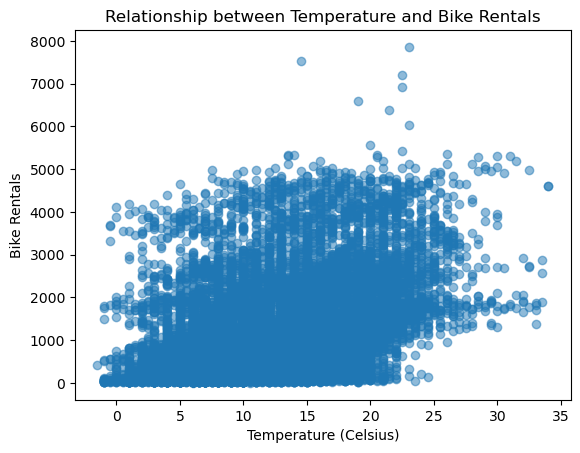

In [38]:
plt.scatter(bike['temp_C'], bike['count'], alpha=0.5)
plt.title('Relationship between Temperature and Bike Rentals')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Rentals')
plt.show()


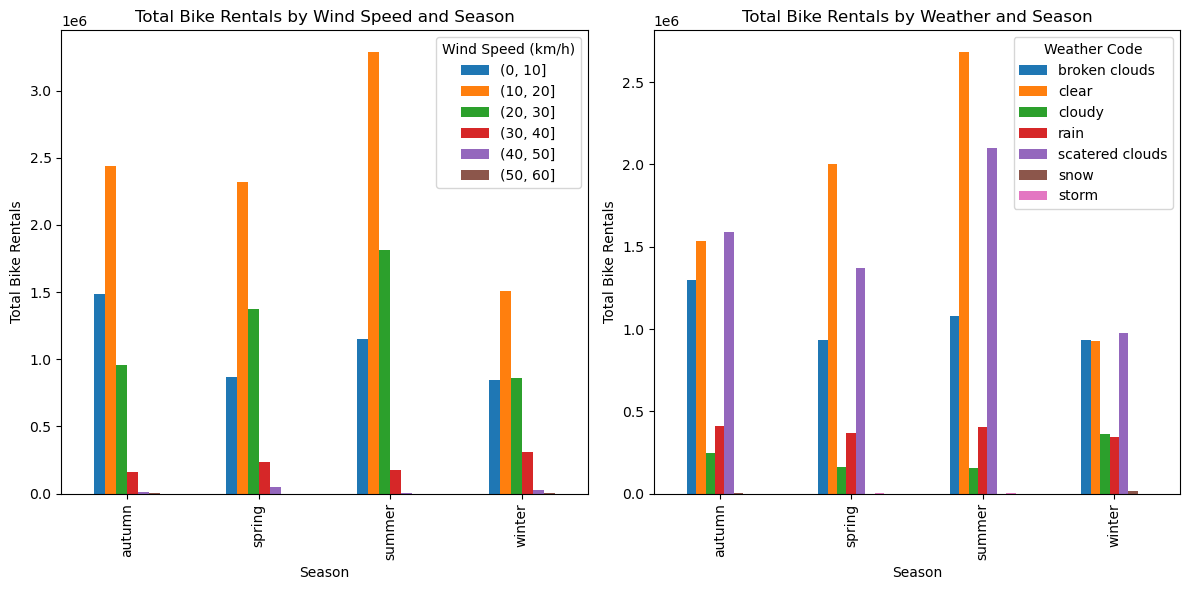

In [39]:
weather_codes = bike.groupby(['season', 'weather'])['count'].sum().reset_index()
weather_codes = weather_codes.pivot(index='season', columns='weather', values='count')

wind_speeds = bike.groupby(['season', pd.cut(bike['wind_km/h'], bins=[0, 10, 20, 30, 40, 50, 60])])['count'].sum().reset_index()
wind_speeds = wind_speeds.pivot(index='season', columns='wind_km/h', values='count')

# plotting the charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# chart for wind speeds and season
wind_speeds.plot(kind='bar', ax=ax[0])
ax[0].set_title('Total Bike Rentals by Wind Speed and Season')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Total Bike Rentals')
ax[0].legend(title='Wind Speed (km/h)', loc='upper right')

# chart for weather codes and season
weather_codes.plot(kind='bar', ax=ax[1])
ax[1].set_title('Total Bike Rentals by Weather and Season')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Total Bike Rentals')
ax[1].legend(title='Weather Code', loc='upper right')

plt.tight_layout()
plt.show()
